In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pickle

def get_internal_and_adjusted_auc(das_type, treatment, outcome_col = 'class_poor'):
    apparent_res_struct = pickle.load(open(f'./data/results/{treatment}/{outcome_col}/{das_type}_{treatment}_{outcome_col}_apparent_eval.data', "rb"))
    
    boot_files = glob.glob(f'./data/results/{treatment}/{outcome_col}/bootstraps/{das_type}*.data')
    
    n_boot_files = len(boot_files)
    
    auc_optimism = np.zeros(n_boot_files)
    
    for idx, boot_file in enumerate(boot_files):
        res_struct = pickle.load(open(boot_file, "rb"))
        
        auc_optimism[idx] = res_struct['auc_optimism']
        
    auc = apparent_res_struct['auc']
    adjusted_auc = apparent_res_struct['auc'] - np.mean(auc_optimism)
    auc_iqr = apparent_res_struct['auc_iqr']
    auc_lower_bound = adjusted_auc - apparent_res_struct['auc_iqr']
    auc_upper_bound = adjusted_auc + apparent_res_struct['auc_iqr']
    
    return auc, adjusted_auc, auc_lower_bound, auc_upper_bound
    
def plot_auc_barchart(das_type, outcome_col = 'class_poor'):
    plt.figure(figsize = (12, 6))
    
    bar_width = 0.3
    
    for n, treatment in enumerate(['etanercept', 'adalimumab']):
        auc, adjusted_auc, auc_lower_bound, auc_upper_bound = get_internal_and_adjusted_auc(das_type, treatment, outcome_col = outcome_col)
        
        plt.bar(np.arange(2) - bar_width + n * bar_width, [auc, adjusted_auc], bar_width, label = treatment, capsize=10)
        
    plt.xticks(np.arange(2) - bar_width / 2, ('Apparent', 'Adjusted'))
    plt.ylim([0, 1])
    plt.ylabel('AUC')
    plt.legend(loc = 'lower right')
    plt.title(das_type)
    plt.savefig(f'./data/images/{das_type}_{outcome_col}_auc_bar.png', bbox_inches = 'tight')

In [2]:
def get_external_val_auc(das_type, treatment, target_treatment, outcome_col = 'class_poor'):
    res_struct = pickle.load(open(f'./data/results/{treatment}/{outcome_col}/external_val/external_val_{das_type}_{outcome_col}_{treatment}_{target_treatment}.data', "rb"))

    return res_struct['auc'], res_struct['auc_std']

def plot_external_val_auc_barchart(das_type, outcome_col = 'class_poor'):
    print(f'plot_auc_barchart: {das_type} - {outcome_col}')
        
    plt.figure(figsize = (12, 6))
    
    bar_width = 0.25
    
    for n, treatment in enumerate(['etanercept', 'adalimumab', 'eta_ada', 'TNFi']):
        vals = []
        std_vals = []
        
        for t_treatment in ['cf', 'cert_gol_inflix', 'nTNFi']:
            if t_treatment == 'cf' and treatment in ['etanercept', 'adalimumab']:
                if treatment == 'etanercept':
                    target_treatment = 'adalimumab'
                else:
                    target_treatment = 'etanercept'
            else:
                target_treatment = t_treatment

            try:
                auc, auc_std = get_external_val_auc(das_type, treatment, target_treatment, outcome_col = outcome_col)

                vals.append(auc)
                std_vals.append(auc_std)
            except:
                continue
            
        vals = np.array(vals)
        std_vals = np.array(std_vals)
        
        n_mis = 3 - len(vals)

        vals = np.pad(vals, (n_mis, 0))
        std_vals = np.pad(std_vals, (n_mis, 0))

        plt.bar(np.arange(3) + n * bar_width, vals, bar_width, yerr = std_vals, label = treatment, capsize=10)
    
    plt.xticks(np.arange(3) + 1.5 * bar_width, ('Counter Factual', 'TNFi', 'nTNFi'))
    plt.ylabel('AUC')
    plt.ylim([0, 1])
    plt.legend(loc = 'lower right')
    plt.title(das_type)
    plt.savefig(f'./data/images/external_val_{das_type}_{outcome_col}_auc_bar.png', bbox_inches = 'tight')

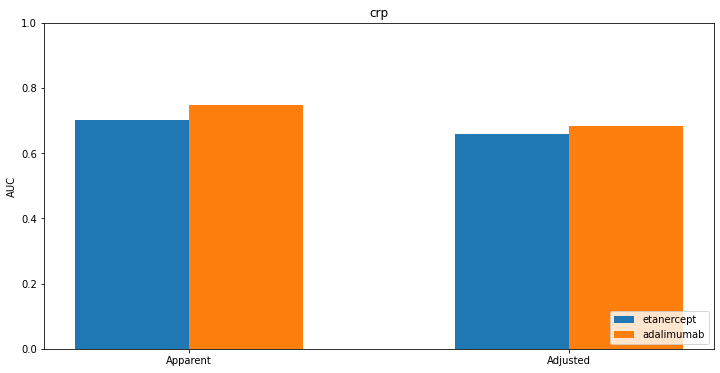

In [3]:
plot_auc_barchart('crp')

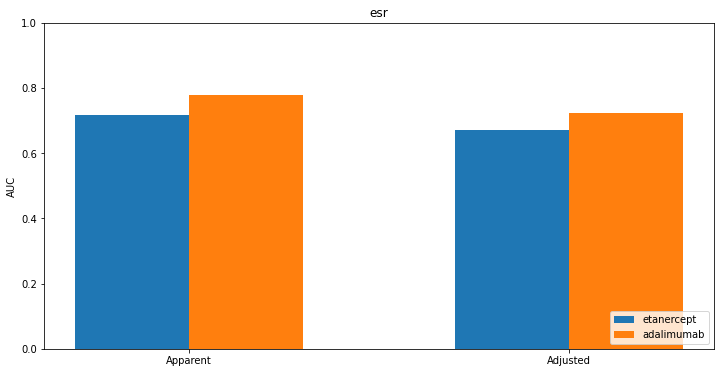

In [4]:
plot_auc_barchart('esr')

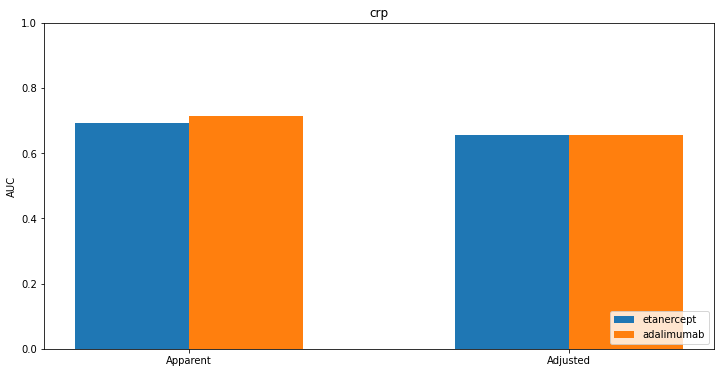

In [5]:
plot_auc_barchart('crp', outcome_col = 'class')

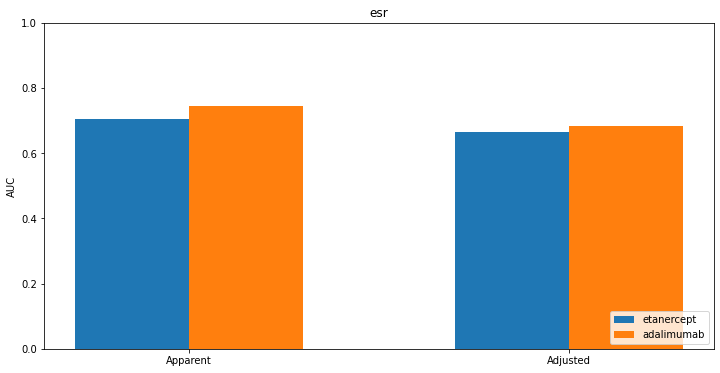

In [6]:
plot_auc_barchart('esr', outcome_col = 'class')

plot_auc_barchart: crp - class_poor


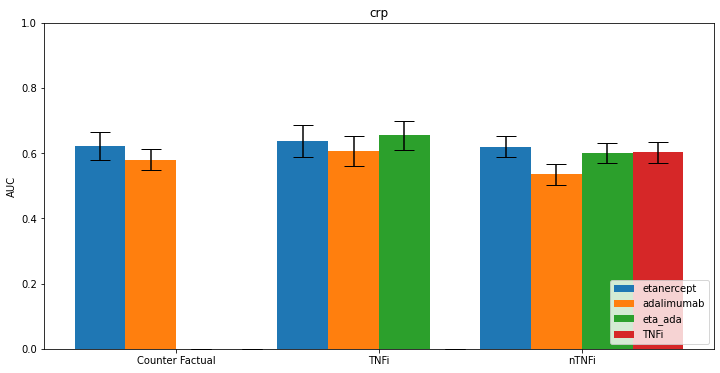

In [7]:
plot_external_val_auc_barchart('crp')

plot_auc_barchart: esr - class_poor


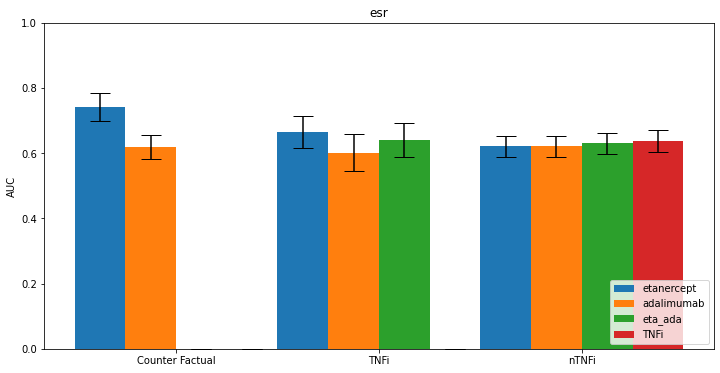

In [8]:
plot_external_val_auc_barchart('esr')

plot_auc_barchart: crp - class


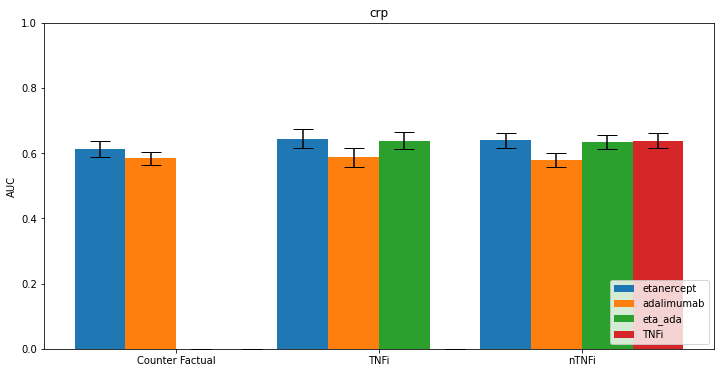

In [9]:
plot_external_val_auc_barchart('crp', outcome_col = 'class')

plot_auc_barchart: esr - class


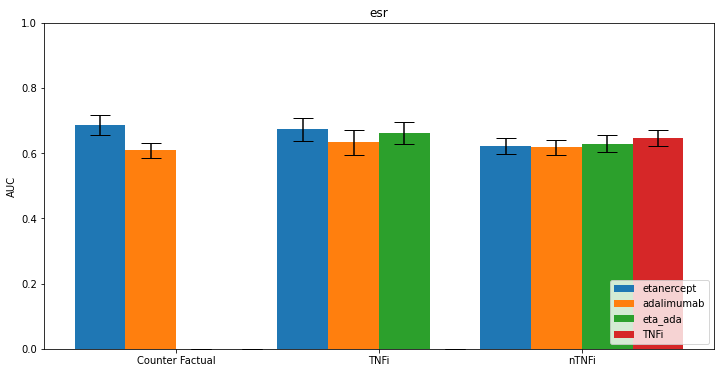

In [10]:
plot_external_val_auc_barchart('esr', outcome_col = 'class')